# Assignment #5 - Deep Learning

##### Saloni Gupta

## I. Overview

In this assignment our knowledge about Deep Neural Networks is tested as we are asked to implement any three types of deep neural networks using Keras or Tensorflow libraries. We are required to implement the experiments on our classification dataset that we have used in the past assignments. I will be using the Tensorflow library and deploying the model on my adult income dataset from UCI Repository. As we are asked to implement three types of networks. I will be implementing deep feed forward network using different combinations of hidden layers to understand affect of different combinations of hidden layers on the performance of the model. I will be implementing models with increasing number of nodes, decreasing number of nodes and then alternating number of nodes. I will be using the following set of hidden layers = {10,20,30,40,50,60}. Also, in our third assignment of Neural Networks, we had implemented Neural Network for our classification dataset, we can use the same class provided by the professor and convert it into a deep neural network by increasing the number of hidden layers. But, for now to experiment with a new code, I have implemented Deep Feed Forwards network using Tensorflow library.

## II. Data

### Introduction of data and source
The dataset that I have selected to visualize represents the income census information of adult individuals and I have selected this income census dataset from the UCI repository(UCI Machine Learning Repository: Adult Data Set). This dataset has been traced from 1994 census database and comprises of information about age groups, work-classes, level of education, country, occupations, etc. It comprises of the following labels:
* age
* workclass
* fnlwgt
* education
* education_num
* marital_status
* occupation
* relationship
* race
* sex
* capital_gain
* capital_loss
* hours_per_week
* native_country
* income

Datasets like this one is widely used for building prediction models about future census information. This dataset houses information of more than 30,000 people. Such datasets can be really helpful in predicting future census information if studied well and can be a good resource.

### Reading the data
The dataset dates-back to the income census database of 1994 and I have sourced this from the UCI repository(UCI Machine Learning Repository: Adult Data Set). The dataset provides information of more than 30,000 people telling about their age, workclass, occupation, country, capital gain, capital loss, level of education, race, biological sex, marital status and about their annual income. This dataset can be used to classify and group people earning more than or less than 50,000 annually and also can be used for future scope for predicting census.

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pandas.tools import plotting
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer
from copy import deepcopy as copy 
%matplotlib inline
from sklearn import preprocessing


In [38]:
df = pd.read_csv('adult.csv')

### Preprocessing

In this section, I have first manually remaned the column names to make them more understandable. Then, I have used the info() and describe() functions to check the details of the dataset. I have narrowed down the dataset by dropping all the irrelevant columns and rows which consisted of null value that is, '?'. Then to utilize the textual data more efficiently, I have converted the textual data into numerical data for all the relevant columns. The last and final step in preprocessing is dividing the dataset into train and test dataset which I have performed in the end.

In [39]:
df = df.replace({'?':np.nan}).dropna()
df = df.dropna()
df = df.reset_index(drop=True)

In [40]:
df['sex']=df['sex'].map({'Male': 1, 'Female': 2})
df['workclass']=df['workclass'].map({'State-gov': 1, 'Self-emp-not-inc': 2,'Private': 3, 'Federal-gov': 4, 'Local-gov': 5, 'Self-emp-inc': 6, 'Never-worked': 7,'Without-pay':8 })
df['education']=df['education'].map({'Preschool': 1, '1st-4th': 2,'5th-6th': 3, '7th-8th': 4, '9th': 5, '10th': 6, '11th': 7,'12th':8, 'HS-grad': 9, 'Some-college': 10, 'Assoc-voc': 11, 'Assoc-acdm': 12, 'Bachelors': 13,'Masters':14, 'Prof-school':15, 'Doctorate': 16})
df['marital.status']=df['marital.status'].map({'Married-spouse-absent': 1, 'Married-civ-spouse': 2,'Never-married': 3, 'Widowed': 4, 'Separated': 5, 'Divorced': 6, 'Married-AF-spouse': 7 })
df['occupation']=df['occupation'].map({'Adm-clerical': 1, 'Farming-fishing': 2,'Machine-op-inspct': 3, 'Other-service': 4, 'Craft-repair': 5, 'Prof-specialty': 6, 'Handlers-cleaners': 7,'Priv-house-serv':8, 'Armed-Forces': 9, 'Exec-managerial': 10, 'Sales': 11, 'Protective-serv': 12, 'Tech-support': 13,'Transport-moving':14})
df['relationship']=df['relationship'].map({'Husband': 1, 'Wife': 2,'Unmarried': 3, 'Not-in-family': 4, 'Other-relative': 5, 'Own-child': 6})
df['race']=df['race'].map({'White': 1, 'Black': 2,'Other': 3, 'Asian-Pac-Islander': 4, 'Amer-Indian-Eskimo': 5})
df['income']=df['income'].map({'<=50K': -1, '>50K': 1})

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null int64
fnlwgt            30162 non-null int64
education         30162 non-null int64
education.num     30162 non-null int64
marital.status    30162 non-null int64
occupation        30162 non-null int64
relationship      30162 non-null int64
race              30162 non-null int64
sex               30162 non-null int64
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
native.country    30162 non-null object
income            30162 non-null int64
dtypes: int64(14), object(1)
memory usage: 3.5+ MB


In [42]:
df.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,3.109807,1.897938e+05,10.121312,10.121312,3.020755,6.645249,2.886281,1.235661,1.324315,1092.007858,88.372489,40.931238,-0.502155
std,13.134665,0.936963,1.056530e+05,2.549995,2.549995,1.391227,3.883256,1.842079,0.698056,0.468126,7406.346497,404.298370,11.979984,0.864792
min,17.000000,1.000000,1.376900e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-1.000000
25%,28.000000,3.000000,1.176272e+05,9.000000,9.000000,2.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.000000,-1.000000
50%,37.000000,3.000000,1.784250e+05,10.000000,10.000000,3.000000,6.000000,3.000000,1.000000,1.000000,0.000000,0.000000,40.000000,-1.000000
75%,47.000000,3.000000,2.376285e+05,13.000000,13.000000,3.000000,10.000000,4.000000,1.000000,2.000000,0.000000,0.000000,45.000000,-1.000000
max,90.000000,8.000000,1.484705e+06,16.000000,16.000000,7.000000,14.000000,6.000000,5.000000,2.000000,99999.000000,4356.000000,99.000000,1.000000


### Visualization of data

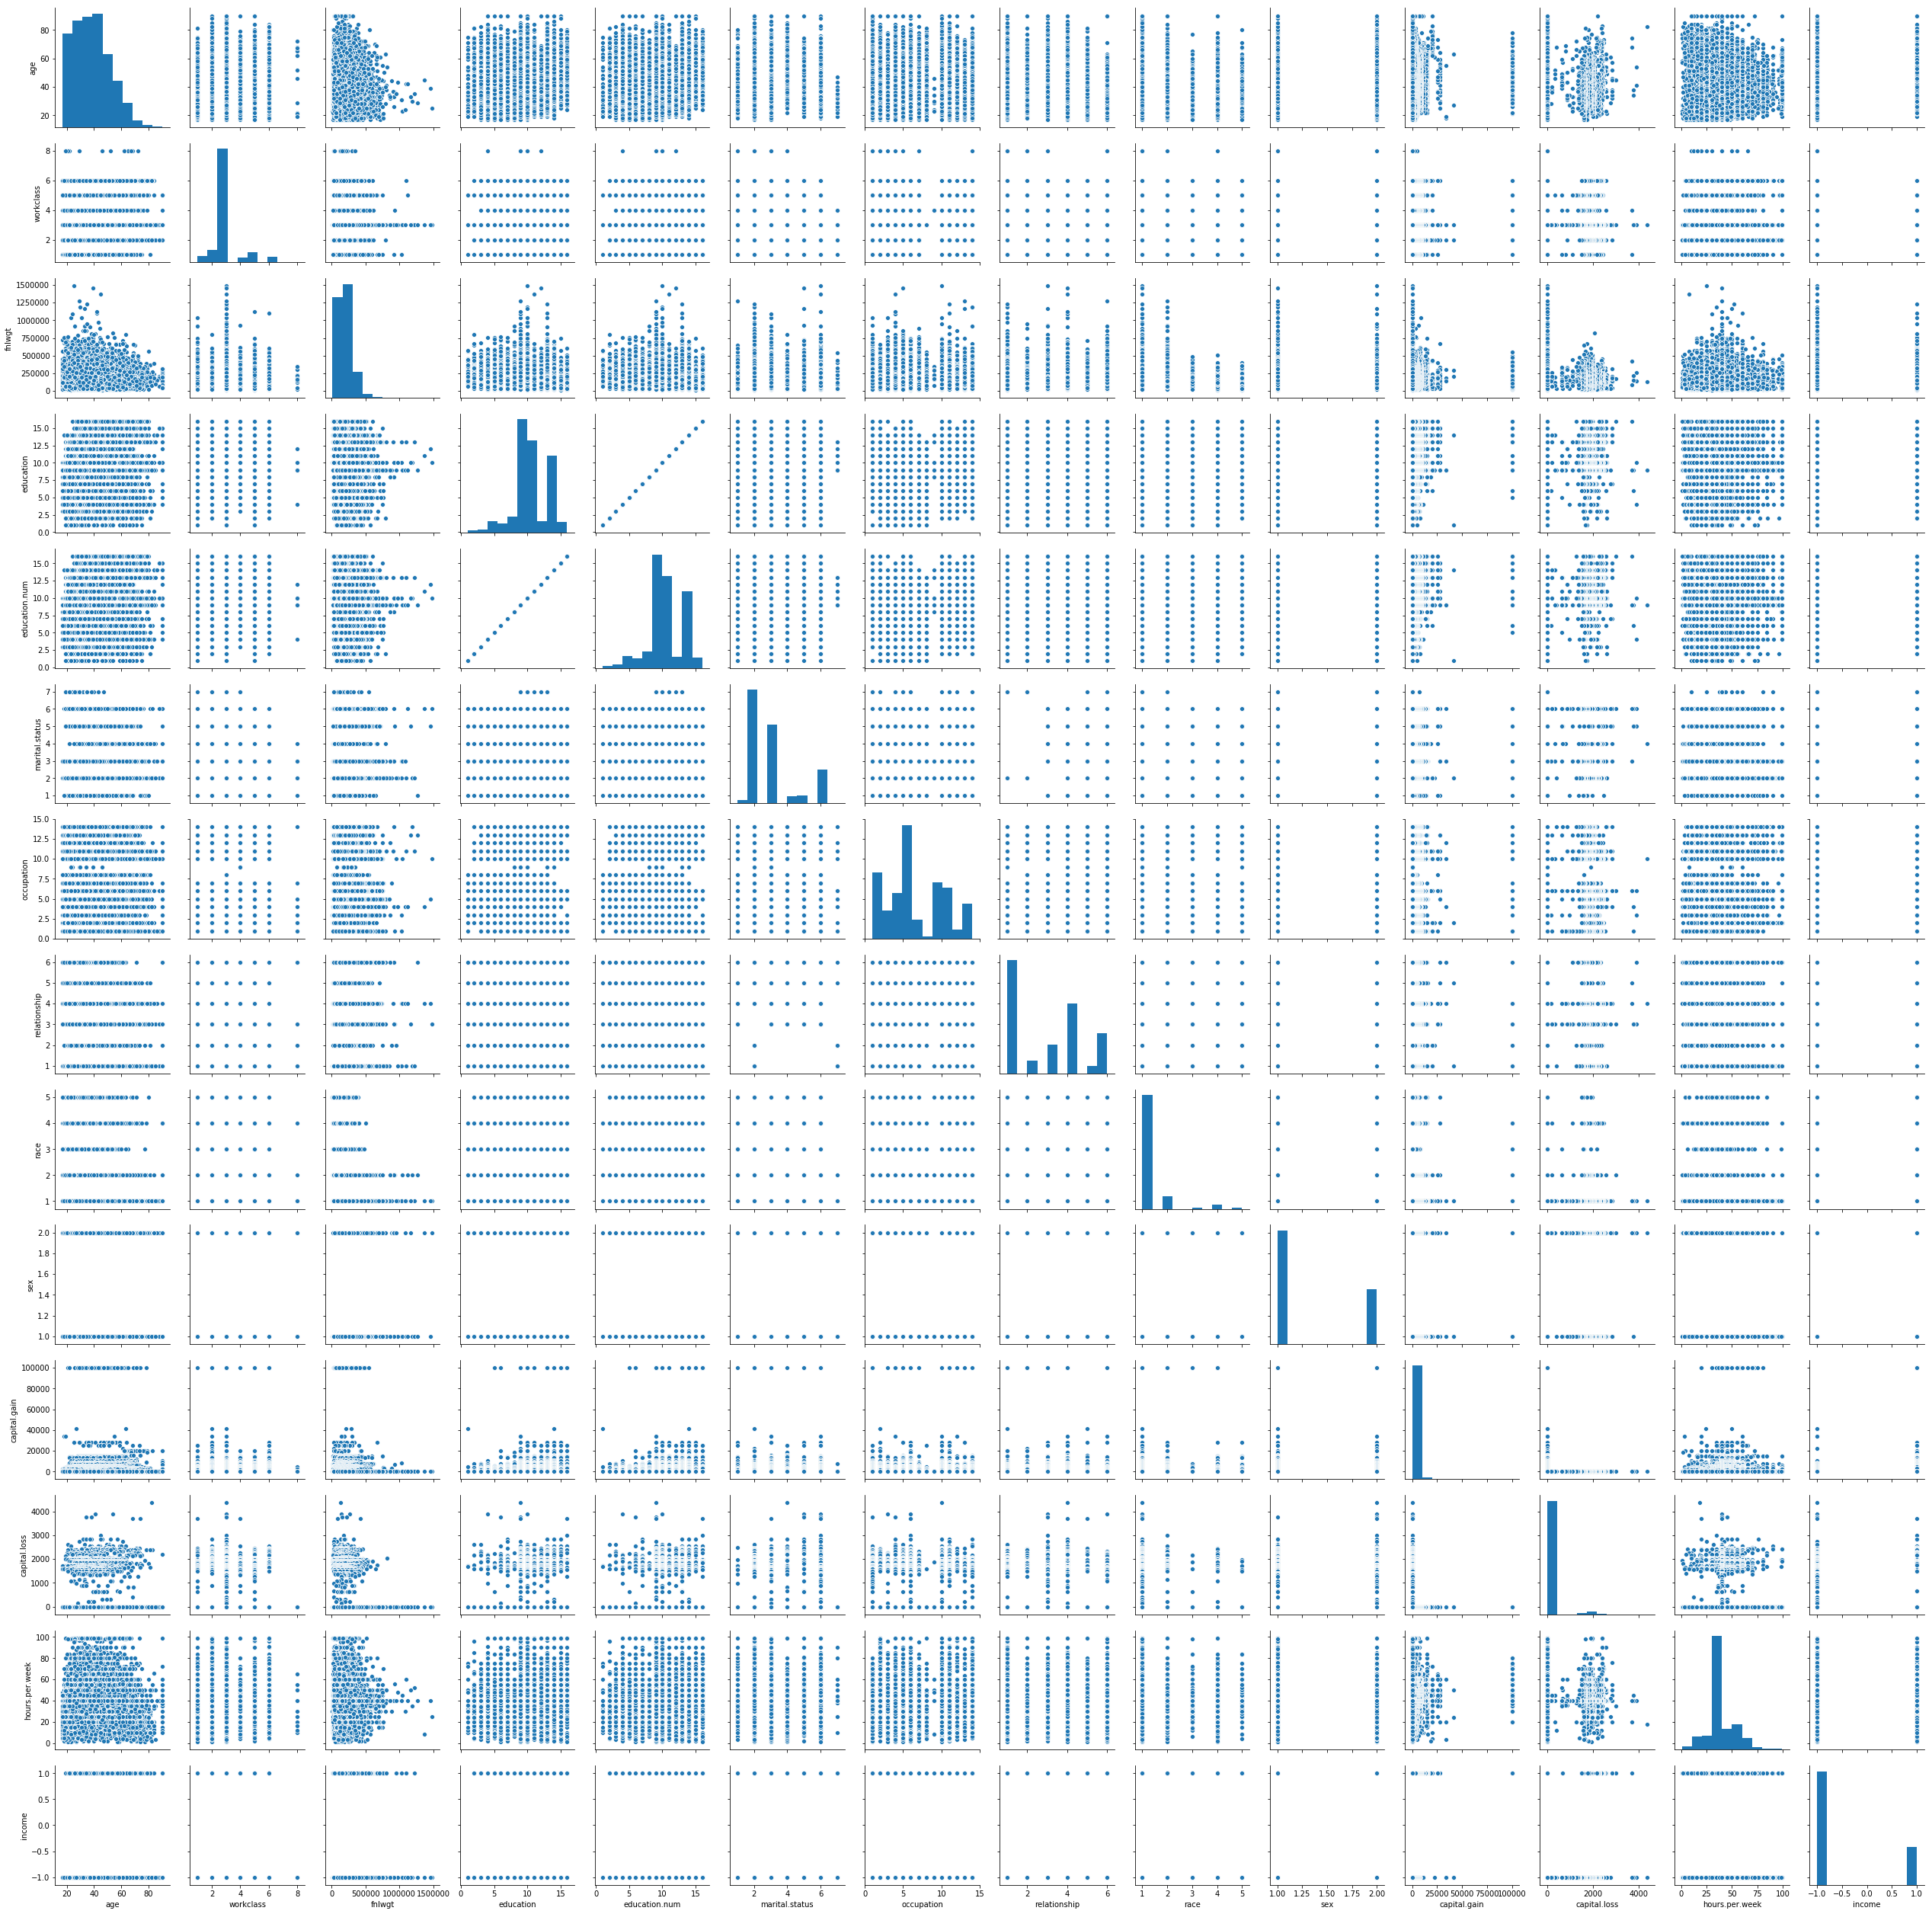

In [7]:
sns.pairplot(df)

The above pairplot graph depicts the simple relationship between every pair of variables in the dataset. These plots help identify any linear relationship or any pattern that might exist between two variables. The graph above uses scatterplot to create these plots in seaborn library. 

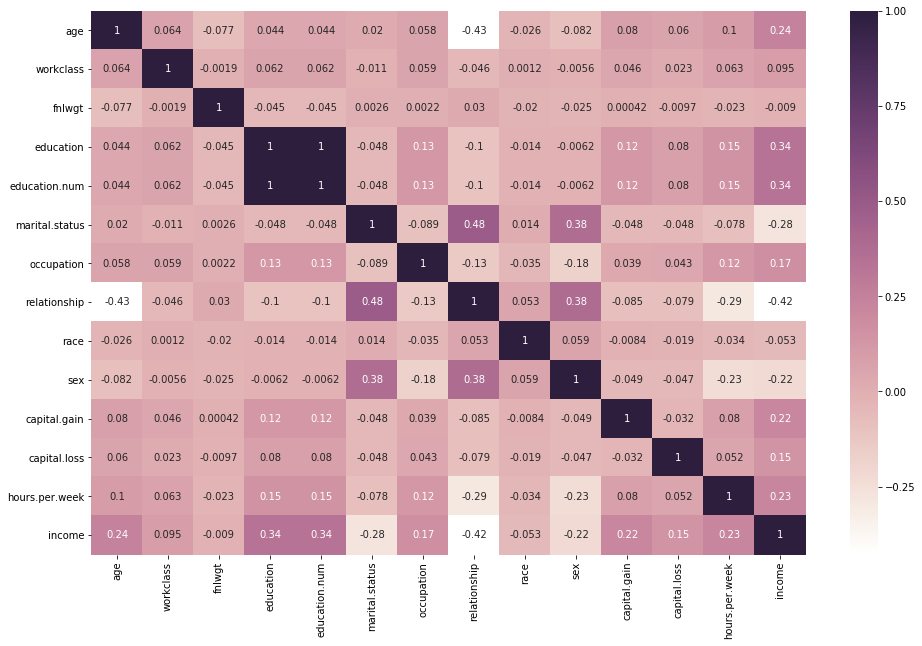

In [8]:
plt.figure(figsize = (16,10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)

In the above plot, I have used seaborn library to build a correlation matrix which gives us a clear numerical value of how closely two variables are correlated. We can see in the graph above that income is largely correlated with age, education and hours_per_week. Similarly, relationship has high correlation with marital status as well as sex. Thus, we can deduce many such correlations for further studies.

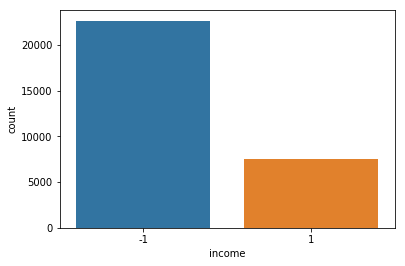

In [9]:
sns.countplot(df['income'],label="Count")
plt.show()

In the above plot, I have tried to count the number of individuals earning greater than 50K and individuals earning less than or equal to 50K a year. It is quite evident, that there is a larger population earning less than equal to 50K and thus more individuals lie in that particular spectrum. I have used a countplot for counting the number of people with the help of seaborn library.

C:\Users\salon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


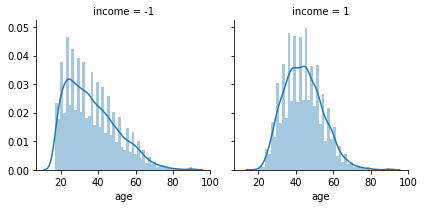

In [10]:
df1 = sns.FacetGrid(df, col='income')
df1.map(sns.distplot, "age")


From the plot above, we can observe that in the spectrum of earning income less than equal to 50K, majority people are at the age of 30 or near 30 while in the other income band, people earning greater than 50K are mostly in the age group of 40-50.

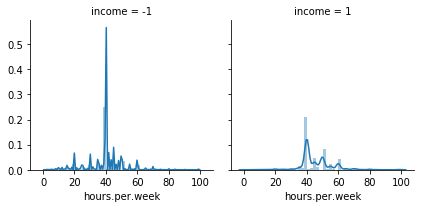

In [11]:
df1 = sns.FacetGrid(df, col='income')
df1.map(sns.distplot, "hours.per.week")

I have used the seaborn library to create the plot above, which depicts that amongst the people earning less than equal to 50K, majority individuals work for around 40-45 hours per week. Which shows that even though they work a lot, they might not be doing very well paid jobs. Similarly, int he other income band also it is evident that people majorly are working for around 40 hours per week which goes to show that there might be a huge difference in wither the level of education or level of work or maybe both since mostly all individuals are working for more or less the same time.

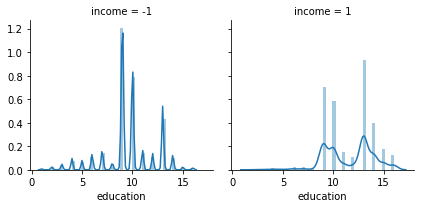

In [12]:
df1 = sns.FacetGrid(df, col='income')
df1.map(sns.distplot, "education")

The above plot shows a comparison in level of education for people earning income, we can see that amongst people earning less than equal to 50K, most people are level 8-10 educated while people earning more are pretty highly educated between level 13-15. There are very few people in the lesser income category who are educated to level 15 or 16.

Text(0, 0.5, 'number of people')

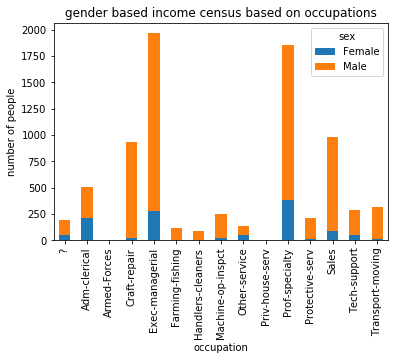

In [14]:
df2 = pd.read_csv('adult.csv')
mylist = ['>50K']
df2 = df2[df2['income'].isin(mylist)]
df2 = df2.groupby(['occupation','sex']).size().sort_values(0, ascending=False)
df2.unstack().head()
my_plot = df2.unstack().plot(kind='bar', stacked=True, title='gender based income census based on occupations')
my_plot.set_xlabel("occupation")
my_plot.set_ylabel("number of people")

For this graph, I have tried to determine the gender-based income census information referring only to people earning more than 50K income. Here the reference is not only to gender but to the field of occupation the individual is involved in. For this I have used stacked bar graph to show the comparison between the two genders. In order to only represent information of individuals earning more than 50K, I have filtered the data by selecting only information of those that come within the slab. We can clearly see that the males are able to contribute the most in every single occupation. There are also occupations where the contribution of women is negligible in earning more than 50K income. This graph not only tells us which gender contributes most but also tells us the occupation which contributes the most towards earning 50K a year. Thus this solves helps establish a connection between gender and occupation that prominently contribute towards the higher earning slab. Also establishes separate connections between census-gender and census-occupation. I have used matplotlib library (Matplotlib: Python Plotting — Matplotlib 3.0.2 Documentation) and pandas library (Python Data Analysis Library — Pandas: Python Data Analysis Library) for plotting the graph.

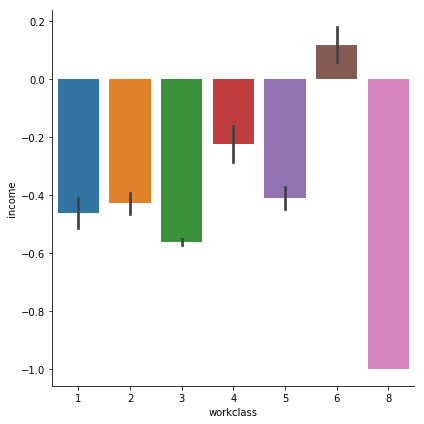

In [15]:
sns.catplot(data=df, x="workclass", y="income",height=6,orient = 'v', kind='bar')


Just like the previous plot, I have used the seaborn library to design this catplot, which depicts that self-employed-inc people are highly likely to be earning more than 50K followed by federal-gov employees in comparison to others. And the graph looks inverted because I have used -1,1 as mapping values for target variable

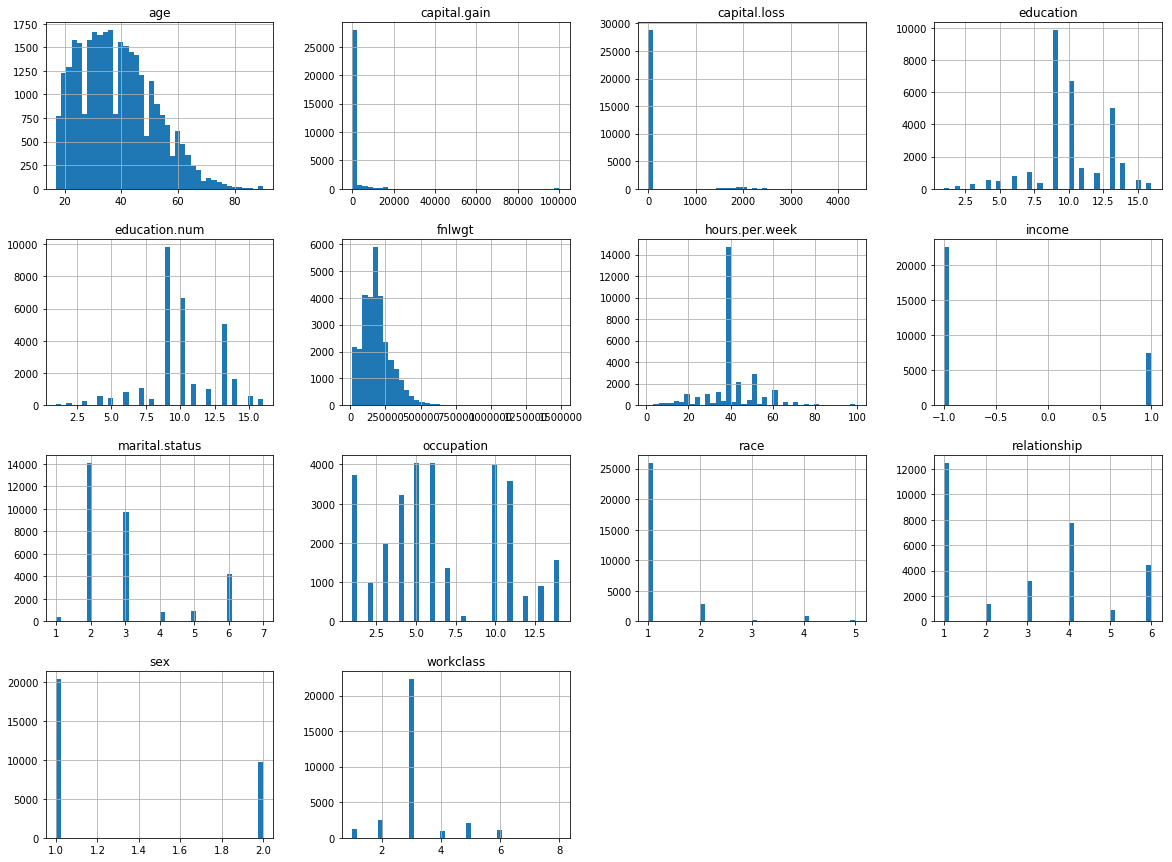

In [16]:
df.hist(bins=40, figsize=(20,15))
plt.show()

The above plot displays histograms to show distribution of data across different ranges. For example, in workclass, maximum population belongs to workclass 3. Similarly there are way more males in the data than females. And majority of the people wor aound 40 hours per week.

### Preliminary Observations

* It can be firstly observed that there exists a high level of correlation between income, age, education and hours_per_week. Similarly sex, relationship and marital status are also highly correlated to each other.

* Then it can be observed that amongst people earning greater than 50K a year, most individuals are male, rather than female and occupationwise, maximum people work in the field of Exec-managerial and prof-specialty.

* Also it is highly likely that an individual would earn more if his level of education is higher and thus the workclass would be higher giving higher pay. 

* By observing the work hours per week we can say that more or less individuals are working for similar time ranges yet there lies a huge difference in the incomes.

* In terms of relationship status and marital status most people are either a husband or a wife and have either married a civilian or armed force person and falls in the higher income range.

* We can also notice that most people belonging to lesser income category are around the age of 30 while individuals earning greater are more towards their fifties.

* Largely this dataset also tells us that there are many more people earning lesser than or equal to 50K in comparison to people earning more than 50K.



## III. Methods
### Three Neural Networks for experiments

We are required to implement three types of deep neural networks and with the aim to understand how performance of the neural network varies with varying combinations of hidden layers, I will be experimenting with three types of models: 

* Increasing nodes model refers to the following combination of layers: 10-> 20-> 30-> 40-> 50-> 60
* Decreasing nodes model refers to the following combination of layers: 60-> 50-> 40-> 30-> 20-> 10
* Alternating nodes model refers to the following combination of layers: 60-> 30-> 60-> 30-> 60-> 30

I am implementing a deep feed forward network with different combination of hidden layers. I tried implementing LSTM in the past but since my data is numerical I figured that Deep FeedForward network would be the best model to go for because according to what I studied online, I could understand that other neural networks like RNN, CNN, LSTM, etc are best suited for image data. Since I am working on numerical data, I believe this model would work better. Also, after experimenting with these three models, I will be experimenting with the professor's code given for our neural networks assignment to convert it into a deep neural network by playing around with the hidden layers. As we are asked to work with more than 5 layers, I am using 6 layers for the implementation. I have studied the multilayer perceptron from online sources to implement best code and I took help from the edureka website from their deep learning course, with the help of which I shall be implementing the models.

#### Selecting number of neurons in hidden layers and why I selected this model
From Introduction to Neural Networks for Java (second edition) by Jeff Heaton I could study the following concepts about selecting number of neurons in hidden layers.
Deciding the number of neurons in the hidden layers is a very important part of deciding your overall neural network architecture. Though these layers do not directly interact with the external environment, they have a tremendous influence on the final output. Both the number of hidden layers and the number of neurons in each of these hidden layers must be carefully considered.

Using too few neurons in the hidden layers will result in something called underfitting which occurs when there are too few neurons in the hidden layers to adequately detect the signals in a complicated data set. On the other hand, using too many neurons in the hidden layers can result in several problems. First, too many neurons in the hidden layers may result in overfitting. Overfitting occurs when the neural network has so much information processing capacity that the limited amount of information contained in the training set is not enough to train all of the neurons in the hidden layers. A second problem can occur even when the training data is sufficient. An inordinately large number of neurons in the hidden layers can increase the time it takes to train the network. The amount of training time can increase to the point that it is impossible to adequately train the neural network. Obviously, some compromise must be reached between too many and too few neurons in the hidden layers.

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

The number of hidden neurons should be between the size of the input layer and the size of the output layer.
The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
The number of hidden neurons should be less than twice the size of the input layer.

I can abide by these rules of thumb directly but in order to understand these theories I am willing to try my own selection of hidden layers to see what outcomes I can get and if these rules are really trust-worthy.

Multilayer Perceptron: A multilayer perceptron (MLP) is a class of feedforward artificial neural network. A MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

Input Nodes – The Input nodes provide information from the outside world to the network and are together referred to as the “Input Layer”. No computation is performed in any of the Input nodes – they just pass on the information to the hidden nodes.

Hidden Nodes – The Hidden nodes have no direct connection with the outside world (hence the name “hidden”). They perform computations and transfer information from the input nodes to the output nodes. A collection of hidden nodes forms a “Hidden Layer”. While a network will only have a single input layer and a single output layer, it can have zero or multiple Hidden Layers. A Multi-Layer Perceptron has one or more hidden layers.

Output Nodes – The Output nodes are collectively referred to as the “Output Layer” and are responsible for computations and transferring information from the network to the outside world.




1. I have first imported all the required libraries at the top.

2. Then I have used the dataframe where my data is stored and segregated the feature and target variables. I have also converted the categorical values into numerical values at the top. 

3. I will be using a one hot encoder function which adds extra columns based on number of labels . Thus it converts class label integers into a one-hot array where each unique label is represented as a column.

4. I have used scikit learn to split the data set into test and train sets of data.

5. I have then defined a few variables like, Learning rate which is the amount by which the weight will be adjusted. Training epochs are the number of iterations and cost history is an array that stores the cost values in successive epochs. Weight is the tensor variable to store weight values and Bias is also a tensor which stores bias values.

6. Further cost is calculated using the formula cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))


7. The model is finally training based on the training_epochs and validated using the test set.

Relu activation: ReLU stands for rectified linear unit, and is a type of activation function. Mathematically, it is defined as y = max(0, x). ReLU is linear (identity) for all positive values, and zero for all negative values. It converges faster. It’s cheap to compute as there is no complicated math. The model can therefore take less time to train or run.

Sigmoid activation: The sigmoid function is used mostly used in classification type problem since we need to scale the data in some given specific range with a threshold. For instance you have two classes where you need to classify you data. using the sigmoid fuction 1/(1+ex) will adjust all your data points between 0 and 1. If you want to adjust it to 2 or a higher value, just change the numerator and you are good to go.

Linear activation: A = cx. A straight line function where activation is proportional to input ( which is the weighted sum from neuron ). It gives a range of activations, so it is not binary activation.



### Implementation

In [43]:
X = ["age","workclass","education","marital.status","occupation","relationship","race","sex","hours.per.week"]

In [44]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode


X = df.loc[:,X].as_matrix()
y = df.loc[:,'income']
X = preprocessing.MinMaxScaler().fit_transform(X)
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)

Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, Y, test_size=0.20, random_state=415)
 
learning_rate = 0.1
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2

n_dim 9


C:\Users\salon\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\salon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In the above segment I performed one hot encoding on my dataset and splitted the dataset using scikit learn to prepare train and test data sets. I have also defined the learning rate at 0.1 and the model will use 100 iterations for training.

### Expanding Deep Neural Network Model:






In [45]:
n_hidden_1 = 10
n_hidden_2 = 20
n_hidden_3 = 30
n_hidden_4 = 40
n_hidden_5 = 50
n_hidden_6 = 60
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    %timeit sess.run(training_step, feed_dict={x: Xtrain, y_: Ttrain})
    cost = sess.run(cost_function, feed_dict={x: Xtrain, y_: Ttrain})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: Xtest})
    mse = tf.reduce_mean(tf.square(pred_y - Ttest))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: Xtrain, y_: Ttrain}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)


59.5 ms ± 6.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  0  -  cost:  0.463395  - MSE:  35.99925343021109 - Train Accuracy:  0.75017613
41.1 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  1  -  cost:  0.402022  - MSE:  35.54968882316272 - Train Accuracy:  0.8127564
37.9 ms ± 647 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  2  -  cost:  0.4068994  - MSE:  35.596990790601446 - Train Accuracy:  0.8152845
38.8 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  3  -  cost:  0.39923424  - MSE:  35.13315021894776 - Train Accuracy:  0.8087778
41 ms ± 3.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  4  -  cost:  0.39637226  - MSE:  34.94668484584512 - Train Accuracy:  0.81851715
38.6 ms ± 796 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  5  -  cost:  0.39361757  - MSE:  34.165012543310155 - Train Accuracy:  0.8124663
38.9 ms ± 1.1 ms per loop (mean ± std. dev. of 7

MSE history


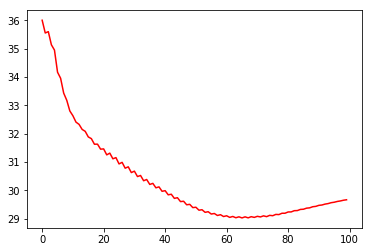

Accuracy over epochs


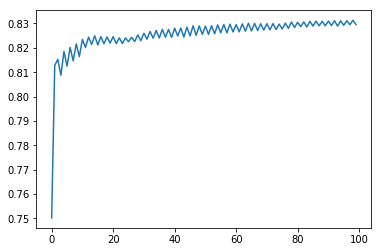

Test accuracy:  0.82512844
MSE: 29.6637


In [46]:
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: Xtest, y_: Ttest})))
pred_y = sess.run(y, feed_dict={x: Xtest})
mse = tf.reduce_mean(tf.square(pred_y - Ttest))
print("MSE: %.4f" % sess.run(mse))
sess.close()

#### Code Explanation
Above is the code for deep neural network which is also known as feed forward network. As the name explains it, it is an expanding model which means that the number of nodes in each hidden layer are expanding with each layer. The nodes are iin the order 10-> 20-> 30-> 40-> 50-> 60. I have selected this model to implement because I wanted to see how the model exploits the features when it is expanded over the hidden layers. Through this code I wanted to understand the effect on performance of the model based on expanding sequence of nodes in hidden layers.

In the above code, I have first defined the number of hidden layers, which is 6 in my case and then defined the number of nodes in each layer. Then I have defined the model, def deep_learning(x, weights, biases). I am using three activation functions here. First three hidden layers are run with RELU activation and last three with sigmoid activation function. The output layer is run with the linear activation function. We have then defined the weights and biases for every layer. Then using init we have initialized all the variables. We are then calling the model using the command y = deep_learning(x, weights, biases). As we are aiming to calculate the cost and accuracy for each iteration, we are calculating it as well. Then for each epoch, the calculated values are stored and printed as output along with plots for error and accuracy. 

### Contracting Deep Neural Network Model

In [21]:
n_hidden_1 = 60
n_hidden_2 = 50
n_hidden_3 = 40
n_hidden_4 = 30
n_hidden_5 = 20
n_hidden_6 = 10
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    %timeit sess.run(training_step, feed_dict={x: Xtrain, y_: Ttrain})
    cost = sess.run(cost_function, feed_dict={x: Xtrain, y_: Ttrain})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: Xtest})
    mse = tf.reduce_mean(tf.square(pred_y - Ttest))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: Xtrain, y_: Ttrain}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)


29.1 ms ± 577 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  0  -  cost:  0.48264885  - MSE:  0.5125119053022773 - Train Accuracy:  0.748767
32.2 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  1  -  cost:  0.45129925  - MSE:  0.6454361804028379 - Train Accuracy:  0.748767
31.3 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  2  -  cost:  0.43078402  - MSE:  0.7740281720648706 - Train Accuracy:  0.7896307
32.5 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  3  -  cost:  0.41816473  - MSE:  0.8601087428640635 - Train Accuracy:  0.7952671
30 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  4  -  cost:  0.4114891  - MSE:  0.9554015855184587 - Train Accuracy:  0.8057524
29.4 ms ± 576 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  5  -  cost:  0.4123367  - MSE:  0.9382691870275476 - Train Accuracy:  0.79970163
29.1 ms ± 417 µs per loop (mean ± std. de

MSE history


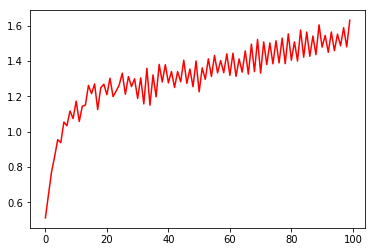

Accuracy over epochs


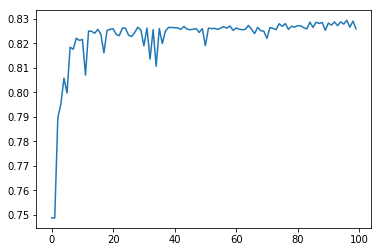

Test accuracy:  0.8224764
MSE: 1.6312


In [22]:
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: Xtest, y_: Ttest})))
pred_y = sess.run(y, feed_dict={x: Xtest})
mse = tf.reduce_mean(tf.square(pred_y - Ttest))
print("MSE: %.4f" % sess.run(mse))
sess.close()

#### Code Explanation
Above is the code for a contracting deep neural network which is also known as feed forward network. As the name explains it, it is a contracting model which means that the number of nodes in each hidden layer are reducing with each layer. The nodes are in the order 60-> 50-> 40-> 30-> 20-> 10. I have selected this model to implement because I wanted to see how the model exploits the features when it is contracted over the hidden layers. Through this code I wanted to understand the effect on performance of the model based on contracting sequence of nodes in hidden layers.

In the above code, I have first defined the number of hidden layers, which is 6 in my case and then defined the number of nodes in each layer. Then I have defined the model, def deep_learning(x, weights, biases). I am using three activation functions here. First three hidden layers are run with RELU activation and last three with sigmoid activation function. The output layer is run with the linear activation function. We have then defined the weights and biases for every layer. Then using init we have initialized all the variables. We are then calling the model using the command y = deep_learning(x, weights, biases). As we are aiming to calculate the cost and accuracy for each iteration, we are calculating it as well. Then for each epoch, the calculated values are stored and printed as output along with plots for error and accuracy. 

### Alternating Nodes in Deep FeedForward Network

In [23]:
n_hidden_1 = 60
n_hidden_2 = 30
n_hidden_3 = 60
n_hidden_4 = 30
n_hidden_5 = 60
n_hidden_6 = 30
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    %timeit sess.run(training_step, feed_dict={x: Xtrain, y_: Ttrain})
    cost = sess.run(cost_function, feed_dict={x: Xtrain, y_: Ttrain})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: Xtest})
    mse = tf.reduce_mean(tf.square(pred_y - Ttest))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: Xtrain, y_: Ttrain}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)


31.9 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  0  -  cost:  0.510009  - MSE:  15.299251298023831 - Train Accuracy:  0.7461561
37.5 ms ± 216 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  1  -  cost:  0.4408436  - MSE:  16.653127051988953 - Train Accuracy:  0.79501843
39.1 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  2  -  cost:  0.425787  - MSE:  15.744044068365483 - Train Accuracy:  0.80202246
38.1 ms ± 492 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  3  -  cost:  0.4152491  - MSE:  15.362620349563878 - Train Accuracy:  0.80720294
37.9 ms ± 319 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  4  -  cost:  0.4066955  - MSE:  15.173478020234008 - Train Accuracy:  0.80861205
38.1 ms ± 405 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
epoch :  5  -  cost:  0.40220755  - MSE:  15.054030261244135 - Train Accuracy:  0.8146629
38.1 ms ± 277 µs per loop (mean ± std. dev. 

MSE history


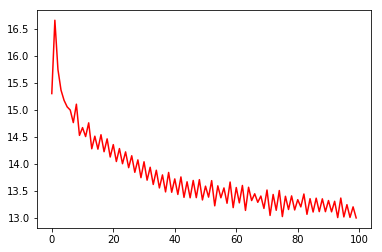

Accuracy over epochs


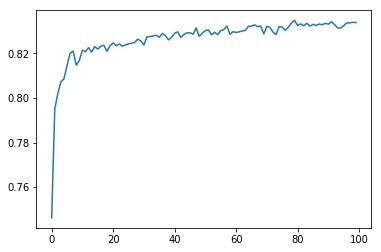

Test accuracy:  0.8206531
MSE: 13.0037


In [24]:
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: Xtest, y_: Ttest})))
pred_y = sess.run(y, feed_dict={x: Xtest})
mse = tf.reduce_mean(tf.square(pred_y - Ttest))
print("MSE: %.4f" % sess.run(mse))
sess.close()

#### Code Explanation
Above is the code for a deep feed forward neural network which comprises of alternating number of nodes in the hidden layers. The nodes are in the order 60-> 30-> 60-> 30-> 60-> 30. I have selected this model to implement because I wanted to see how the model exploits the features when it is alternated over the hidden layers. Through this code I wanted to understand the effect on performance of the model based on alternating sequence of nodes in hidden layers.

In the above code, I have first defined the number of hidden layers, which is 6 in my case and then defined the number of nodes in each layer. Then I have defined the model, def deep_learning(x, weights, biases). I am using three activation functions here. First three hidden layers are run with RELU activation and last three with sigmoid activation function. The output layer is run with the linear activation function. We have then defined the weights and biases for every layer. Then using init we have initialized all the variables. We are then calling the model using the command y = deep_learning(x, weights, biases). As we are aiming to calculate the cost and accuracy for each iteration, we are calculating it as well. Then for each epoch, the calculated values are stored and printed as output along with plots for error and accuracy.

## Experiments:


### Reduced number of nodes in hidden layers

#### Expanding

In [25]:
n_hidden_1 = 5
n_hidden_2 = 8
n_hidden_3 = 11
n_hidden_4 = 14
n_hidden_5 = 17
n_hidden_6 = 20
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    %timeit sess.run(training_step, feed_dict={x: Xtrain, y_: Ttrain})
    cost = sess.run(cost_function, feed_dict={x: Xtrain, y_: Ttrain})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: Xtest})
    mse = tf.reduce_mean(tf.square(pred_y - Ttest))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: Xtrain, y_: Ttrain}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)


10.8 ms ± 286 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  0  -  cost:  0.56031835  - MSE:  0.32066041103230253 - Train Accuracy:  0.748767
13.2 ms ± 69.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  1  -  cost:  0.38165927  - MSE:  0.7375894819403881 - Train Accuracy:  0.8216669
13.3 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  2  -  cost:  0.36858365  - MSE:  0.9429410357912681 - Train Accuracy:  0.8268888
13.5 ms ± 455 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  3  -  cost:  0.36752957  - MSE:  1.0127402549038065 - Train Accuracy:  0.8255212
13.4 ms ± 285 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  4  -  cost:  0.3668498  - MSE:  1.1797006858091794 - Train Accuracy:  0.8295412
13.3 ms ± 63.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  5  -  cost:  0.36679095  - MSE:  1.082411069599664 - Train Accuracy:  0.82605994
13.5 ms ± 353 µs per loop (mean ± st

MSE history


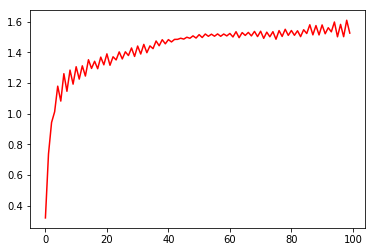

Accuracy over epochs


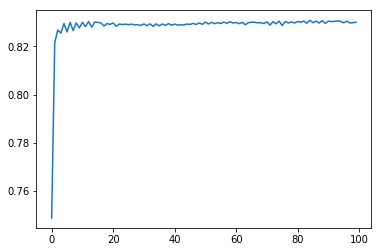

Test accuracy:  0.8279463
MSE: 1.5256


In [26]:
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: Xtest, y_: Ttest})))
pred_y = sess.run(y, feed_dict={x: Xtest})
mse = tf.reduce_mean(tf.square(pred_y - Ttest))
print("MSE: %.4f" % sess.run(mse))
sess.close()

In the code above I have reduced the number of nodes to see what impact it has on the performance. I am here experimenting with increasing number of nodes in hidden layers. I can see that we have quite a high accuracy of 0.82 and MSE of 2.35 which seems to be a good enough result. It was better than expanding model but still contracting model is a better model.

#### Contracting

In [27]:
n_hidden_1 = 20
n_hidden_2 = 17
n_hidden_3 = 14
n_hidden_4 = 11
n_hidden_5 = 8
n_hidden_6 = 5
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    %timeit sess.run(training_step, feed_dict={x: Xtrain, y_: Ttrain})
    cost = sess.run(cost_function, feed_dict={x: Xtrain, y_: Ttrain})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: Xtest})
    mse = tf.reduce_mean(tf.square(pred_y - Ttest))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: Xtrain, y_: Ttrain}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)


13 ms ± 896 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  0  -  cost:  0.6324148  - MSE:  1.4858185503731758 - Train Accuracy:  0.748767
14.1 ms ± 48 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  1  -  cost:  0.526646  - MSE:  1.1108544699179035 - Train Accuracy:  0.748767
14.2 ms ± 292 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  2  -  cost:  0.45543647  - MSE:  1.3120197484738478 - Train Accuracy:  0.748767
14.2 ms ± 304 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  3  -  cost:  0.4160819  - MSE:  1.364055164543853 - Train Accuracy:  0.81685936
14.1 ms ± 431 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  4  -  cost:  0.41234007  - MSE:  1.3382635067555602 - Train Accuracy:  0.8050893
14.1 ms ± 402 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  5  -  cost:  0.39632687  - MSE:  1.4904298289340665 - Train Accuracy:  0.8255626
14.4 ms ± 678 µs per loop (mean ± std. dev. of 

MSE history


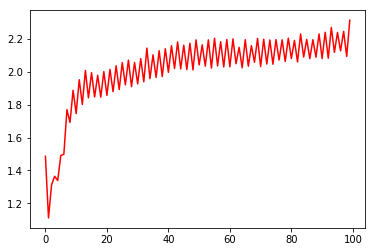

Accuracy over epochs


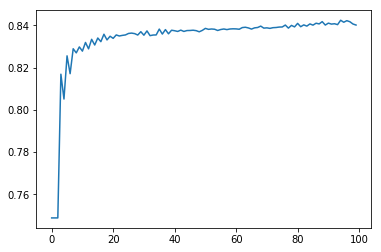

Test accuracy:  0.82545996
MSE: 2.3134


In [28]:
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: Xtest, y_: Ttest})))
pred_y = sess.run(y, feed_dict={x: Xtest})
mse = tf.reduce_mean(tf.square(pred_y - Ttest))
print("MSE: %.4f" % sess.run(mse))
sess.close()

In the code above I have reduced the number of nodes to see what impact it has on the performance. I am here experimenting with decreasing number of nodes in hidden layers. I can see that we have quite a high accuracy of 0.82 and MSE of 1.02 which seems to be a good enough result. This is way better than the previous model and hence a better option to use for such a scenario.

#### Alternating

In [29]:
n_hidden_1 = 20
n_hidden_2 = 5
n_hidden_3 = 20
n_hidden_4 = 5
n_hidden_5 = 20
n_hidden_6 = 5
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    %timeit sess.run(training_step, feed_dict={x: Xtrain, y_: Ttrain})
    cost = sess.run(cost_function, feed_dict={x: Xtrain, y_: Ttrain})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: Xtest})
    mse = tf.reduce_mean(tf.square(pred_y - Ttest))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: Xtrain, y_: Ttrain}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)


11.8 ms ± 342 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  0  -  cost:  0.56959385  - MSE:  0.5995747997174337 - Train Accuracy:  0.748767
15.4 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  1  -  cost:  0.39460126  - MSE:  0.7739885161453537 - Train Accuracy:  0.82286876
14.9 ms ± 836 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  2  -  cost:  0.3778723  - MSE:  0.9722794086614907 - Train Accuracy:  0.82576984
15.2 ms ± 659 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  3  -  cost:  0.371816  - MSE:  1.1060853660909837 - Train Accuracy:  0.8269302
15 ms ± 443 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  4  -  cost:  0.36861873  - MSE:  1.14734449317719 - Train Accuracy:  0.82871234
15.3 ms ± 504 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
epoch :  5  -  cost:  0.36669502  - MSE:  1.2433257116710688 - Train Accuracy:  0.8292097
14.4 ms ± 451 µs per loop (mean ± std. de

MSE history


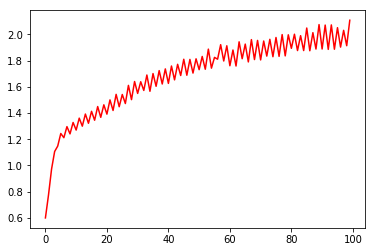

Accuracy over epochs


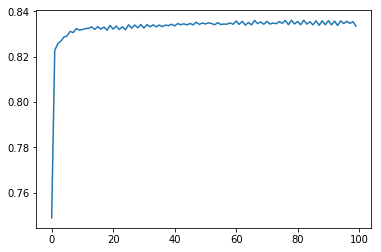

Test accuracy:  0.8279463
MSE: 2.1070


In [30]:
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: Xtest, y_: Ttest})))
pred_y = sess.run(y, feed_dict={x: Xtest})
mse = tf.reduce_mean(tf.square(pred_y - Ttest))
print("MSE: %.4f" % sess.run(mse))
sess.close()

In the code above I have reduced the number of nodes to see what impact it has on the performance. I am here experimenting with alternating number of nodes in hidden layers. I can see that we have quite a high accuracy of 0.82 and MSE of 2.35 which seems to be a good enough result. The MSE is better than the expanding model but it is still not good enough in comparison to contracting model.

### Increased number of nodes in hidden layer

#### Expanding

In [31]:
n_hidden_1 = 100
n_hidden_2 = 150
n_hidden_3 = 200
n_hidden_4 = 250
n_hidden_5 = 300
n_hidden_6 = 350
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    %timeit sess.run(training_step, feed_dict={x: Xtrain, y_: Ttrain})
    cost = sess.run(cost_function, feed_dict={x: Xtrain, y_: Ttrain})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: Xtest})
    mse = tf.reduce_mean(tf.square(pred_y - Ttest))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: Xtrain, y_: Ttrain}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)


497 ms ± 23.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  0  -  cost:  7.321812  - MSE:  261.9910514780036 - Train Accuracy:  0.748767
485 ms ± 18.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  1  -  cost:  1.5838802  - MSE:  41.385820739291766 - Train Accuracy:  0.74922293
504 ms ± 25.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  2  -  cost:  3.892016  - MSE:  112.62480311637798 - Train Accuracy:  0.748767
482 ms ± 17.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  3  -  cost:  0.93695354  - MSE:  20.035628571660386 - Train Accuracy:  0.7398566
489 ms ± 19.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  4  -  cost:  0.97327983  - MSE:  18.65908272682606 - Train Accuracy:  0.73243815
494 ms ± 24.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  5  -  cost:  0.94771945  - MSE:  18.97621939976955 - Train Accuracy:  0.7326454
481 ms ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loo

MSE history


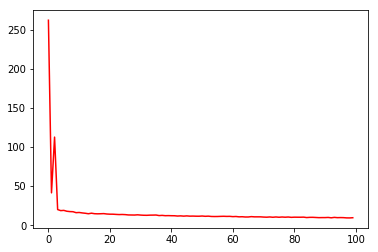

Accuracy over epochs


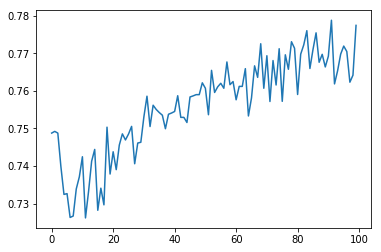

Test accuracy:  0.75368804
MSE: 9.5799


In [32]:
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: Xtest, y_: Ttest})))
pred_y = sess.run(y, feed_dict={x: Xtest})
mse = tf.reduce_mean(tf.square(pred_y - Ttest))
print("MSE: %.4f" % sess.run(mse))
sess.close()

In the code above I have increased the number of nodes to see what impact it has on the performance. I am here experimenting with increasing number of nodes in hidden layers. I can see that we have quite a high accuracy of 0.79 and MSE of 42.52 which seems to be quite a not good result. This model is not the best for this scenario.

#### Contracting

In [33]:
n_hidden_1 = 350
n_hidden_2 = 300
n_hidden_3 = 250
n_hidden_4 = 200
n_hidden_5 = 150
n_hidden_6 = 100
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    %timeit sess.run(training_step, feed_dict={x: Xtrain, y_: Ttrain})
    cost = sess.run(cost_function, feed_dict={x: Xtrain, y_: Ttrain})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: Xtest})
    mse = tf.reduce_mean(tf.square(pred_y - Ttest))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: Xtrain, y_: Ttrain}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)


495 ms ± 30.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  0  -  cost:  0.70456743  - MSE:  50.11589218983873 - Train Accuracy:  0.7620291
488 ms ± 19.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  1  -  cost:  0.5498807  - MSE:  47.73409422163241 - Train Accuracy:  0.7893821
480 ms ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  2  -  cost:  0.5352853  - MSE:  46.84652241230163 - Train Accuracy:  0.78623235
487 ms ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  3  -  cost:  0.48421133  - MSE:  46.329831830435616 - Train Accuracy:  0.7960131
486 ms ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  4  -  cost:  0.46136498  - MSE:  45.62442713725145 - Train Accuracy:  0.80032325
490 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  5  -  cost:  0.4360645  - MSE:  44.96411213281951 - Train Accuracy:  0.81085
494 ms ± 23.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop 

MSE history


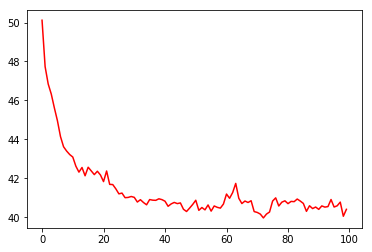

Accuracy over epochs


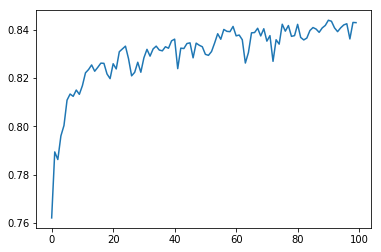

Test accuracy:  0.8204873
MSE: 40.4149


In [34]:
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: Xtest, y_: Ttest})))
pred_y = sess.run(y, feed_dict={x: Xtest})
mse = tf.reduce_mean(tf.square(pred_y - Ttest))
print("MSE: %.4f" % sess.run(mse))
sess.close()

In the code above I have increased the number of nodes to see what impact it has on the performance. I am here experimenting with decreasing number of nodes in hidden layers. I can see that we have quite a high accuracy of 0.81 and MSE of 5.01 which seems to be a good enough result. The MSE is wuite high but still quite in comparison to other mdoels in this scenario.

#### Alternating

In [35]:
n_hidden_1 = 350
n_hidden_2 = 150
n_hidden_3 = 350
n_hidden_4 = 150
n_hidden_5 = 350
n_hidden_6 = 150
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    %timeit sess.run(training_step, feed_dict={x: Xtrain, y_: Ttrain})
    cost = sess.run(cost_function, feed_dict={x: Xtrain, y_: Ttrain})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: Xtest})
    mse = tf.reduce_mean(tf.square(pred_y - Ttest))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: Xtrain, y_: Ttrain}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)


511 ms ± 24.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  0  -  cost:  0.67066383  - MSE:  2.8225450206831364 - Train Accuracy:  0.68767875
535 ms ± 28.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  1  -  cost:  0.60263044  - MSE:  2.925128937775657 - Train Accuracy:  0.7206681
508 ms ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  2  -  cost:  0.5960461  - MSE:  2.977874296928849 - Train Accuracy:  0.71996355
521 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  3  -  cost:  0.5577142  - MSE:  3.0817790511750567 - Train Accuracy:  0.73960793
518 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  4  -  cost:  0.49962944  - MSE:  3.2081885343569407 - Train Accuracy:  0.75324297
520 ms ± 15.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
epoch :  5  -  cost:  0.5090456  - MSE:  3.320990813191995 - Train Accuracy:  0.7524141
511 ms ± 17.7 ms per loop (mean ± std. dev. of 7 runs,

MSE history


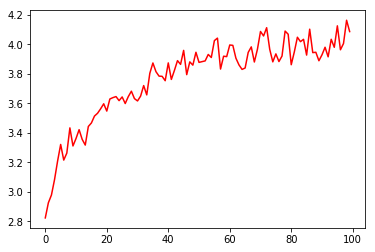

Accuracy over epochs


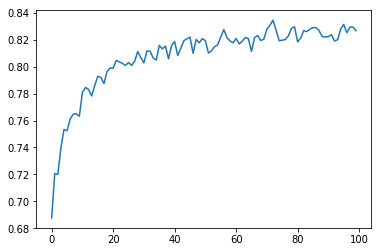

Test accuracy:  0.80639815
MSE: 4.0869


In [36]:
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: Xtest, y_: Ttest})))
pred_y = sess.run(y, feed_dict={x: Xtest})
mse = tf.reduce_mean(tf.square(pred_y - Ttest))
print("MSE: %.4f" % sess.run(mse))
sess.close()

In the code above I have increased the number of nodes to see what impact it has on the performance. I am here experimenting with alternating number of nodes in hidden layers. I can see that we have quite a high accuracy of 0.81 and MSE of 15.59 which seems to be a good enough result. But the MSE is very high and it might not be the best model in such a scenario.

## Results

After I performed all the above mentioned experiments, I was able to come up with average time taken by each model, accuracy provided and also the MSE error. I have tabulated the results roughly to deduce which model works better in which circumstance.

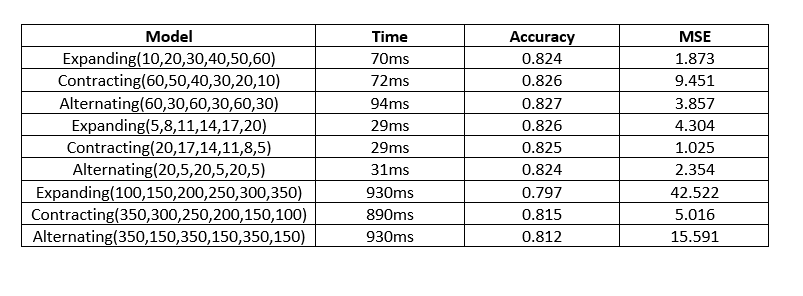

From these results it can be said that in terms of time taken, when there were less number of nodes in hidden layers, the expanding and contracting model gave comparable results. Then on having more nodes in the hidden layers, expanding model showed lesser execution time. On having too many nodes in hidden layers, contracting model performed the best.

Now on the basis of accuracy, when there were less number of nodes in hidden layers, the expanding model gave best accuracy. Then on having more nodes in the hidden layers, alternating model showed better results. On having too many nodes in hidden layers, contracting model performed the best.

In case of MSE, when there were less number of nodes in hidden layers, the contracting model gave least error. Then on having more nodes in the hidden layers, expanding model showed better results. On having too many nodes in hidden layers, contracting model performed the best.

We can see that when we have too many nodes in hidden layers, contracting model seems to work the best out of all in all scenarios. Then expanding model and then the alternating model works better.


## Conclusions

From this assignment I was able to study more about neural networks and used some online sources to study about deep feed forward or multilayer perceptron model as well. I have tried to experiment with different conditions of nodes in the hidden layers. And in the results, I have written my deductions of how I think the models performed in different scenarios. I have plotted two graphs for every experiment showing the accuracy achieved. This was a kind of difficult assignment to start with because I did not want to simply use professor's code and wanted to learn a new way of coding a deep network. But once I was able to understand how it works, it was very easy to further implement other scenarios. 

## References:

UCI Machine Learning Repository: Adult Data Set. https://archive.ics.uci.edu/ml/datasets/adult. Accessed 30 Jan. 2019.

Matplotlib: Python Plotting — Matplotlib 3.0.2 Documentation. https://matplotlib.org/. Accessed 30 Jan. 2019.

Python Data Analysis Library — Pandas: Python Data Analysis Library. https://pandas.pydata.org/. Accessed 30 Jan. 2019.

Seaborn: Statistical Data Visualization — Seaborn 0.9.0 Documentation. https://seaborn.pydata.org/. Accessed 12 Feb. 2019.

Sharma, Mohit. “What Steps Should One Take While Doing Data Preprocessing?” Hacker Noon, 25 July 2018, https://hackernoon.com/what-steps-should-one-take-while-doing-data-preprocessing-502c993e1caa.

NumPy — NumPy. http://www.numpy.org/. Accessed 12 Feb. 2019.

https://www.edureka.co/blog/perceptron-learning-algorithm/

https://en.wikipedia.org/wiki/Feedforward_neural_network

https://towardsdatascience.com/deep-learning-feedforward-neural-network-26a6705dbdc7

https://www.deeplearningbook.org/contents/mlp.html




# Extra Credit

For the extra credit section we were supposed run our dataset on gpu and notice the time and performance. I used google colab for gpu as it was more feasible to implement. I will be attaching my ipynb files that I ran on google colab so that you can see the results that I achieved. For running the codes on google colab I simply uploaded my .ipynb file on drive and fetched it using google colab and then uploaded my dataset as well. Then by changing the runtime type to 'GPU' I was able to make my file run on gpu. I have tabulated the results I achieved on gpu and without gpu and then I will be comparing the results.

For results without gpu:
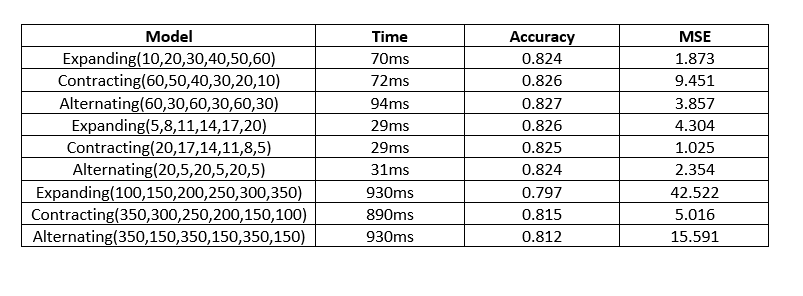

For results with gpu:
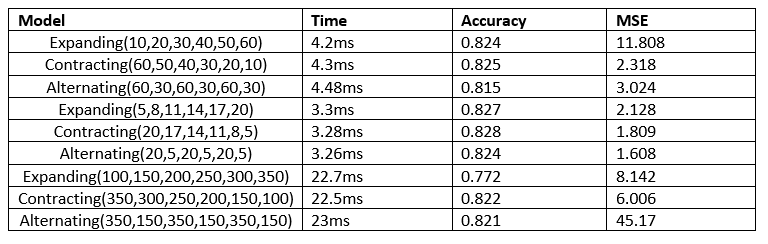

Firstly we can see a vast difference in the results of the two cases. 

* When we run the codes without gpu, following are my deductions:

From these results it can be said that in terms of time taken, when there were less number of nodes in hidden layers, the expanding and contracting model gave comparable results. Then on having more nodes in the hidden layers, expanding model showed lesser execution time. On having too many nodes in hidden layers, contracting model performed the best.

Now on the basis of accuracy, when there were less number of nodes in hidden layers, the expanding model gave best accuracy. Then on having more nodes in the hidden layers, alternating model showed better results. On having too many nodes in hidden layers, contracting model performed the best.

In case of MSE, when there were less number of nodes in hidden layers, the contracting model gave least error. Then on having more nodes in the hidden layers, expanding model showed better results. On having too many nodes in hidden layers, contracting model performed the best.

We can see that when we have too many nodes in hidden layers, contracting model seems to work the best out of all in all scenarios. Then expanding model and then the alternating model works better.

* Now when we run the codes on gpu, I can deduce the following:

From these results it can be said that in terms of time taken, when there were less number of nodes in hidden layers, the alternating model gave better results. Then on having more nodes in the hidden layers, expanding model showed lesser execution time. On having too many nodes in hidden layers, alternating model performed the best.

Now on the basis of accuracy, when there were less number of nodes in hidden layers, the contracting model gave best accuracy. Then on having more nodes in the hidden layers, contracting model showed better results. On having too many nodes in hidden layers, contracting model performed the best.

In case of MSE, when there were less number of nodes in hidden layers, the alternating model gave least error. Then on having more nodes in the hidden layers, contracting model showed better results. On having too many nodes in hidden layers, contracting model performed the best.

We got comparably more variable results when we use gpu. The biggest difference was in the runtime as it vastly decreased. Then we can see that in most cases the alternating model performed very well on gpu. 

Following are the screenshots of the graphs I achieved from running the code on google colab using gpu. But it can be said from the results that Expanding model where the number of neurons in each hidden layer increases from input to output layers trains fastest and gives decent results. But when we increase the number of neurons largely, the contracting model seems to be performing better but that way the training time is huge and hence it should be avoided.

###### Expanding(10,20,30,40,50,60)
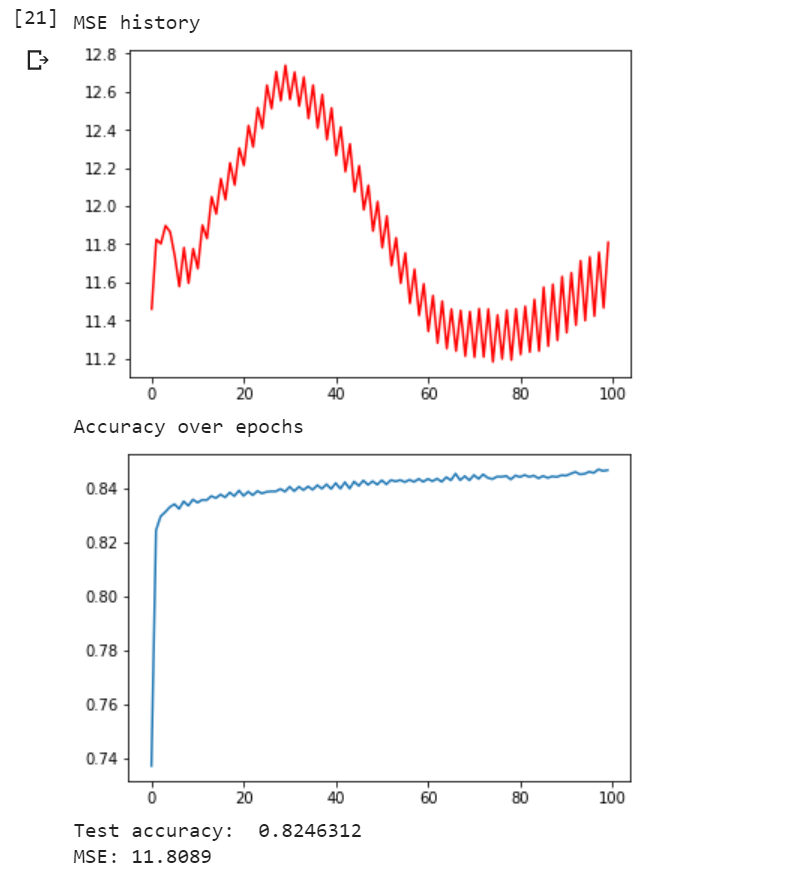

###### Contracting(60,50,40,30,20,10)
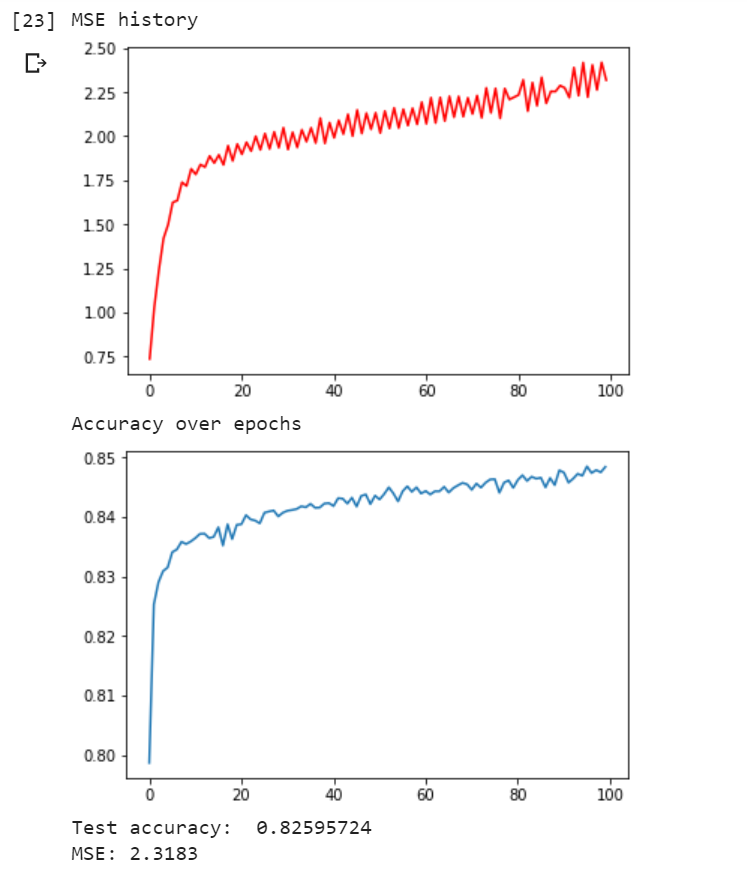

###### Alternating(60,30,60,30,60,30)
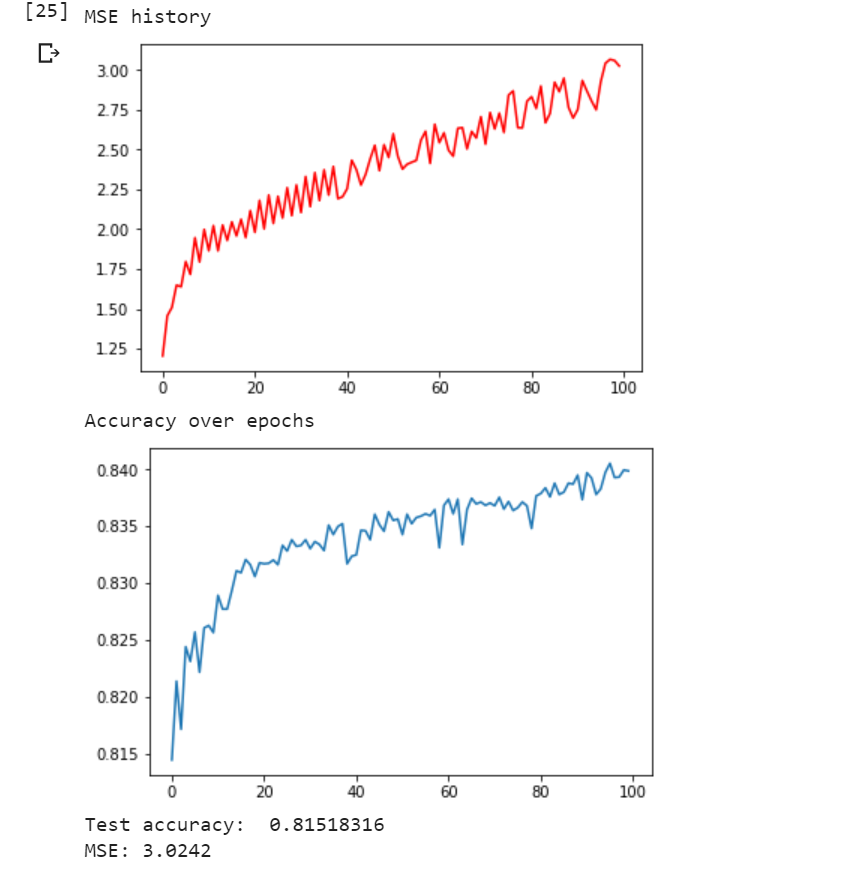

###### Expanding(5,8,11,14,17,20)
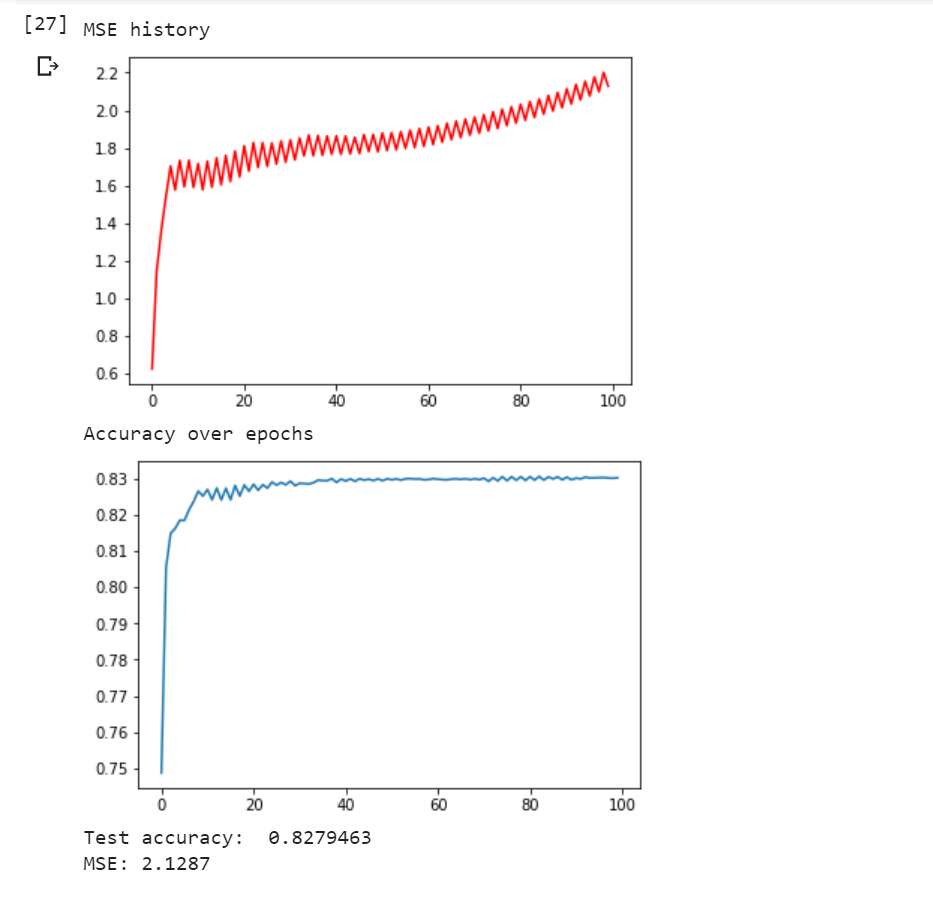

###### Contracting(20,17,14,11,8,5)
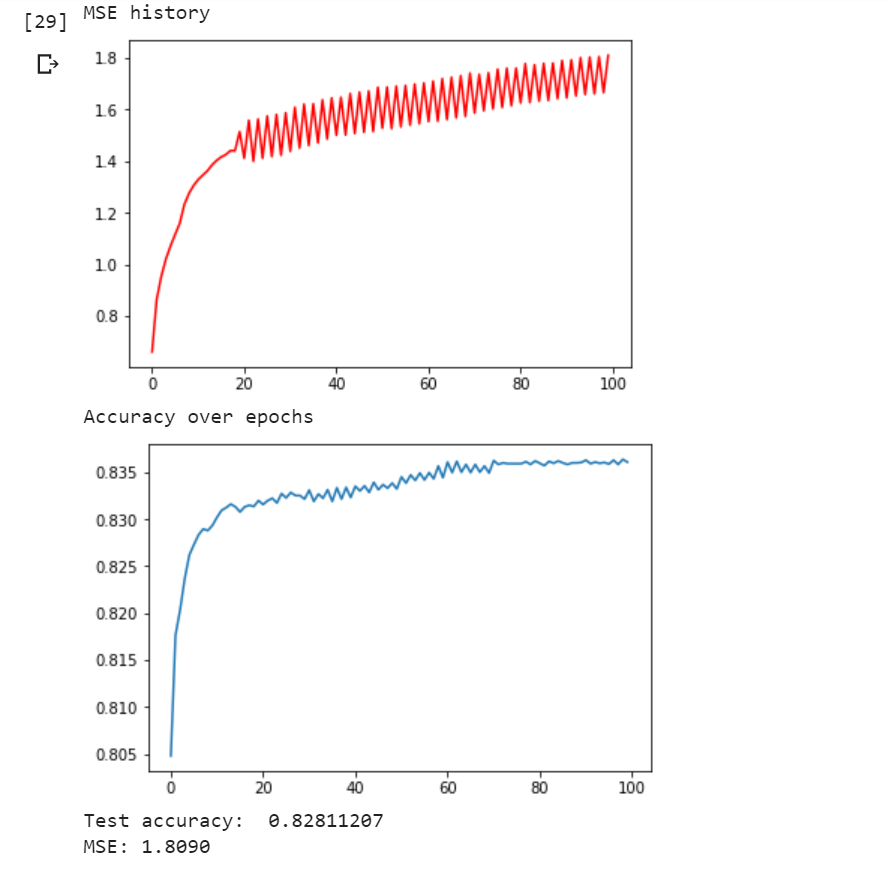

###### Alternating(20,5,20,5,20,5)
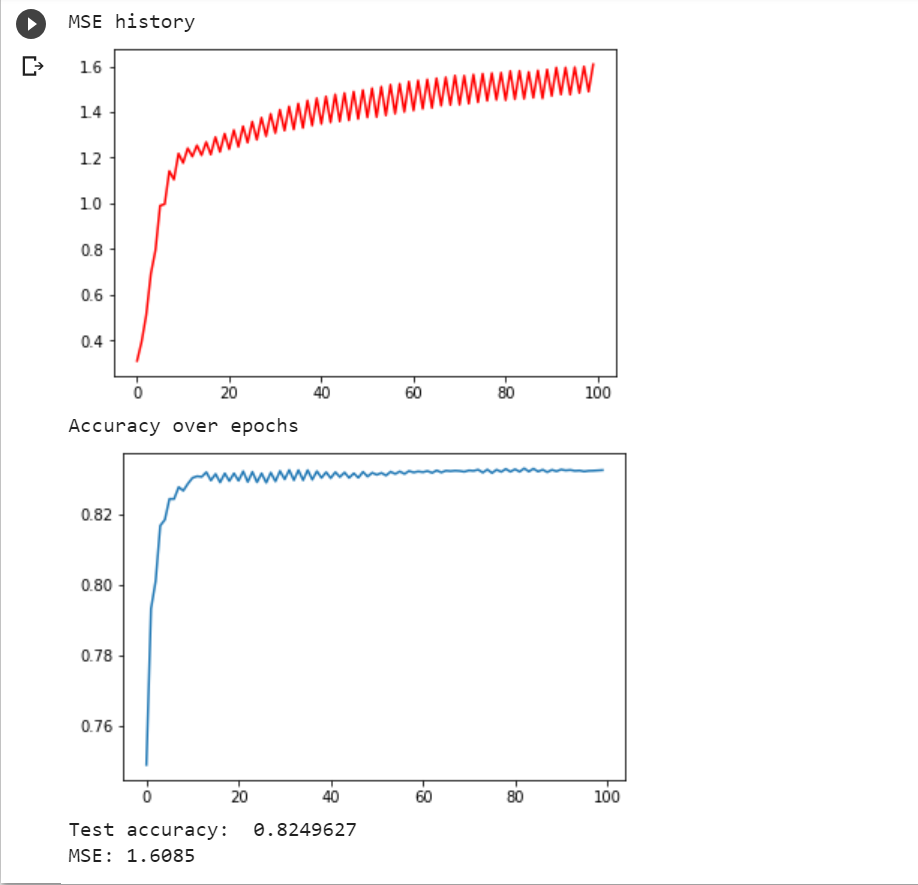

###### Expanding(100,150,200,250,300,350)
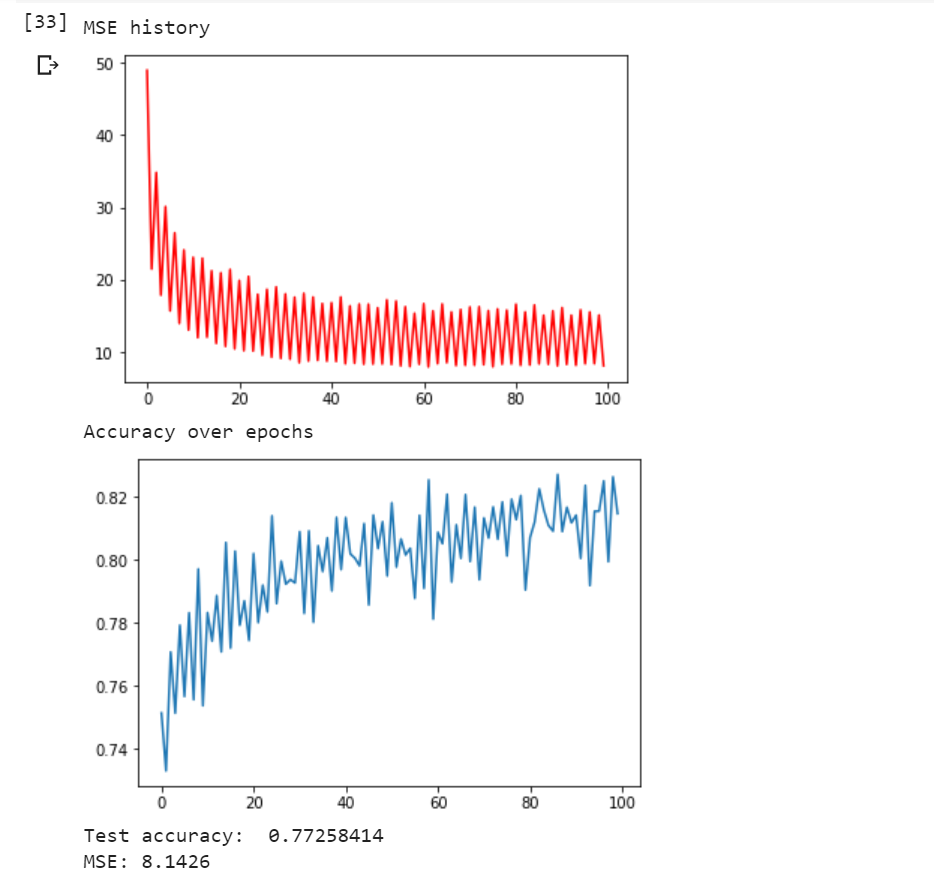

###### Contracting(350,300,250,200,150,100)
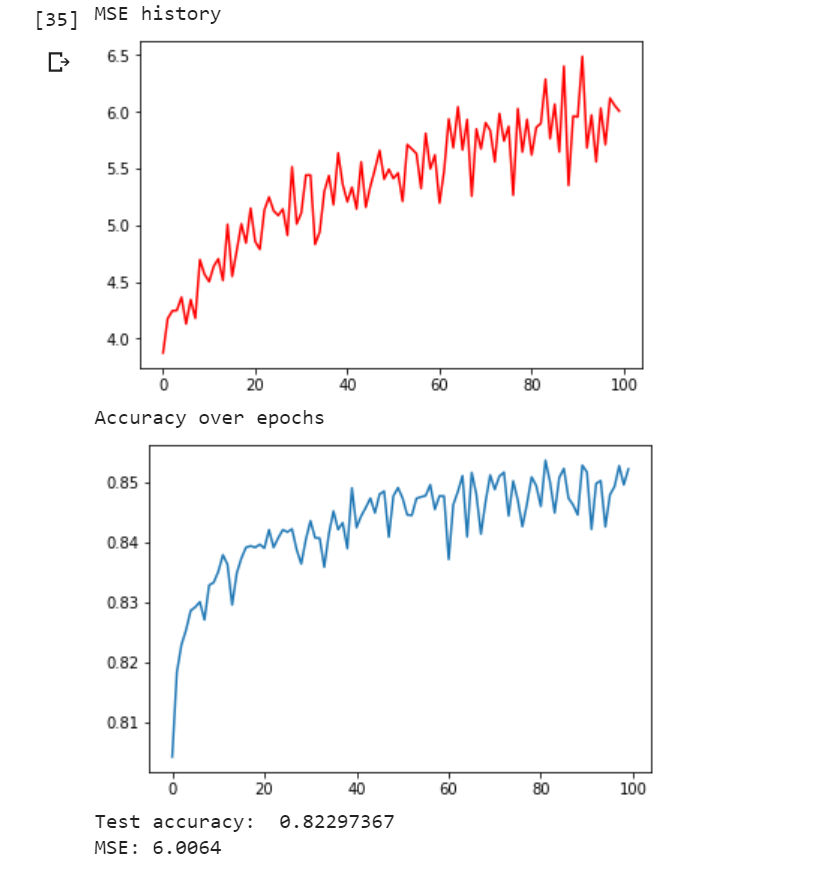

###### Alternating(350,150,350,150,350,150)
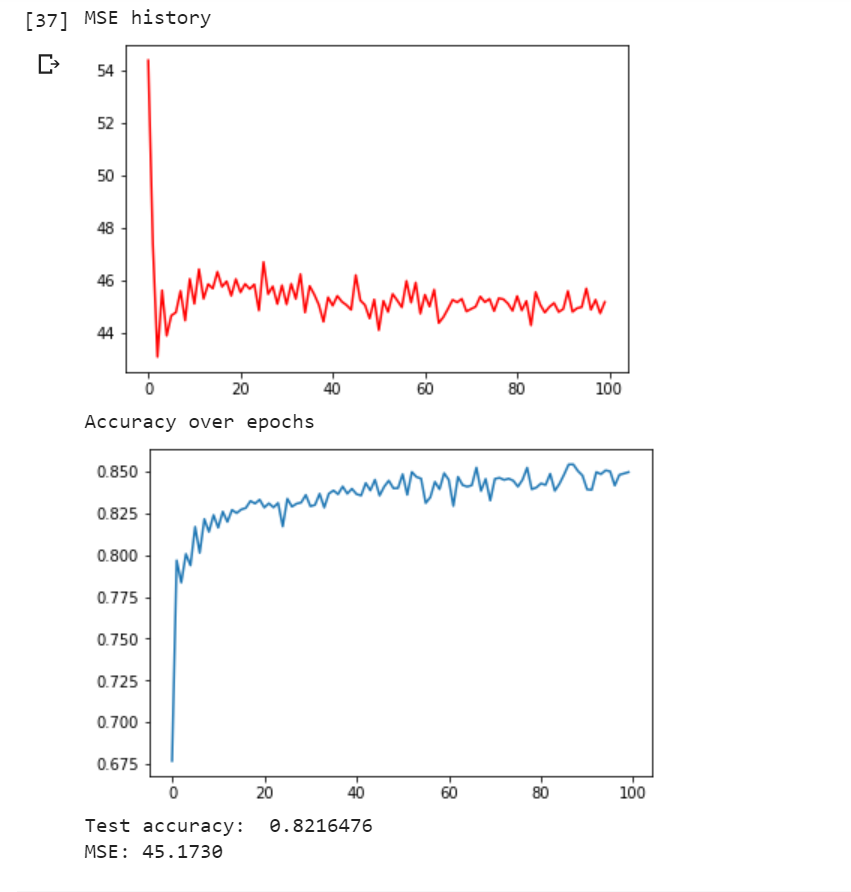